In [80]:
import tensorflow as tf 
from tensorflow import keras


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image

import pickle

In [30]:
def load_mnist(source='keras', local='../data/fashion-mnist.dat'):
    if source == 'keras':
        fashion_mnist = keras.datasets.fashion_mnist
        (X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
        
    elif source == 'local':
        with open(local, "rb") as f:
            (X_train_full, y_train_full), (X_test, y_test) = pickle.load(f)
            
    return X_train_full, y_train_full, X_test, y_test

In [53]:
X_train_full, y_train_full, X_test, y_test = load_mnist('keras')

In [54]:
for set_ in [X_train_full, y_train_full, X_test, y_test]:
    print(set_.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [55]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

del X_train_full, y_train_full

In [56]:
class_names = ['tshirt', 'trousers', 'jumper', 'dress', 'coat',
               'sandals', 'shirt', 'trainers', 'bag', 'boots']

In [58]:
class_names[y_train[0]]

'coat'

In [68]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [69]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, # or 'sparse_categorical_crossentropy', all ->https://keras.io/api/losses/
              optimizer=keras.optimizers.SGD(lr=0.01), # or 'sgd', all -> https://keras.io/api/optimizers/
              metrics=[keras.metrics.sparse_categorical_accuracy] # or 'accuracy', all -> https://keras.io/api/metrics/
             )

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [71]:
history = model.fit(X_train, y_train,
                   epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7226 - sparse_categorical_accuracy: 0.7613 - val_loss: 0.5184 - val_sparse_categorical_accuracy: 0.8238
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4906 - sparse_categorical_accuracy: 0.8298 - val_loss: 0.4391 - val_sparse_categorical_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4446 - sparse_categorical_accuracy: 0.8452 - val_loss: 0.4302 - val_sparse_categorical_accuracy: 0.8518
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4182 - sparse_categorical_accuracy: 0.8535 - val_loss: 0.3995 - val_sparse_categorical_accuracy: 0.8610
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3972 - sparse_categorical_accuracy: 0.8602 - val_loss: 0.3775 - val_sparse_categorical_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3815 - spars

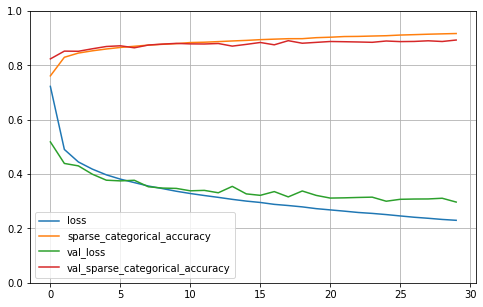

In [81]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [82]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 60.4415 - sparse_categorical_accuracy: 0.8579


[60.441532135009766, 0.8579000234603882]

In [101]:
# couple of predictions

for i in range(10):

    predictions = np.argmax(model.predict(X_test[i].reshape(1, 28, 28)), axis=1)
    print(np.array(class_names)[predictions])
    display(Image.fromarray(X_test[i]))
    print('---------------\n')

['boots']


---------------

['jumper']


---------------

['trousers']


---------------

['trousers']


---------------

['shirt']


---------------

['trousers']


---------------

['coat']


---------------

['shirt']


---------------

['sandals']


---------------

['trainers']


---------------

